# Project data exploration II -
## plotting categorical plot and incorporating other data

---


We will continue to work with the dataset that your group is consider for the term project. In this notebook we will create some plot using the Seaborn module and the different categorical plots we practiced in class. Additionally, we will explore the idea of working with other datasets in addition to the one you originally selected to strengthen your argument.

Group name:  Group 13
Created by Kaulan Serzhanuly, Shruthi Raghavan, Haitham Assaf (018226910) (017558515)
Last updated: 10/11/2024  

In [2]:
# import ur stuff here
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
print("Loading datasets...")
vg_sales = pd.read_csv('https://raw.githubusercontent.com/CS133-DataVisualization/term-project-group-13/refs/heads/main/vg_sales_v1.csv')
twitch_stats = pd.read_csv('https://raw.githubusercontent.com/CS133-DataVisualization/term-project-group-13/refs/heads/main/twitch_stats_v1.csv')

# Merge datasets on Game column
merged_df = pd.merge(vg_sales, twitch_stats, on='Game', how='inner')

print(f"Original games: {len(vg_sales)}")
print(f"Twitch stats: {len(twitch_stats)}")
print(f"Merged dataset: {len(merged_df)}")
print("\nDataset loaded successfully!")

Loading datasets...
Original games: 2500
Twitch stats: 2500
Merged dataset: 3834

Dataset loaded successfully!


### Q1: How clean is your data?  
Do you have formatting concerns, null values, inconsistent data, etc... If so, explain what cleaning or reformating you have to do and how you plan to approach this cleaning steps.


Our data is mostly clean and well-structured with consistent data types and realistic numeric ranges. The only notable issues are 587 missing values in the Region column and 492 duplicate game entries across both datasets, likely from multi-platform releases. We plan to handle missing Region values by filling them with "Unknown" and remove duplicate game rows to maintain one unique record per title. After these steps, the dataset will be fully ready for analysis.

In [4]:
print('=== DATA CLEANLINESS ANALYSIS ===')
print(f'Dataset shapes:')
print(f'vg_sales: {vg_sales.shape}')
print(f'twitch_stats: {twitch_stats.shape}')

print('\n=== MISSING VALUES ===')
print('vg_sales missing values:')
print(vg_sales.isnull().sum())
print('\ntwitch_stats missing values:')
print(twitch_stats.isnull().sum())

print('\n=== DATA TYPES ===')
print('vg_sales dtypes:')
print(vg_sales.dtypes)
print('\ntwitch_stats dtypes:')
print(twitch_stats.dtypes)

print('\n=== DUPLICATE CHECK ===')
print(f'Duplicate games in vg_sales: {vg_sales.duplicated(subset=["Game"]).sum()}')
print(f'Duplicate games in twitch_stats: {twitch_stats.duplicated(subset=["Game"]).sum()}')

print('\n=== BASIC STATISTICS ===')
print('vg_sales numeric columns:')
print(vg_sales.describe())
print('\ntwitch_stats numeric columns:')
print(twitch_stats.describe())


=== DATA CLEANLINESS ANALYSIS ===
Dataset shapes:
vg_sales: (2500, 14)
twitch_stats: (2500, 6)

=== MISSING VALUES ===
vg_sales missing values:
Game                  0
Platform              0
Genre                 0
Publisher             0
Year                  0
Global_Sales_M        0
Critic_Score          0
User_Score            0
ESRB_Rating           0
Dev_Team_Size         0
Budget_MUSD           0
Region              587
Franchise             0
Metascore_Bucket      0
dtype: int64

twitch_stats missing values:
Game                           0
Avg_Concurrent_Viewers         0
Peak_Concurrent_Viewers        0
Monthly_Hours_Watched_M        0
Streamer_Count                 0
Streaming_Popularity_Bucket    0
dtype: int64

=== DATA TYPES ===
vg_sales dtypes:
Game                 object
Platform             object
Genre                object
Publisher            object
Year                  int64
Global_Sales_M      float64
Critic_Score          int64
User_Score          float64
ESRB_

### Q2: Create a categorical plot
Which video game genre has the highest average global sales?



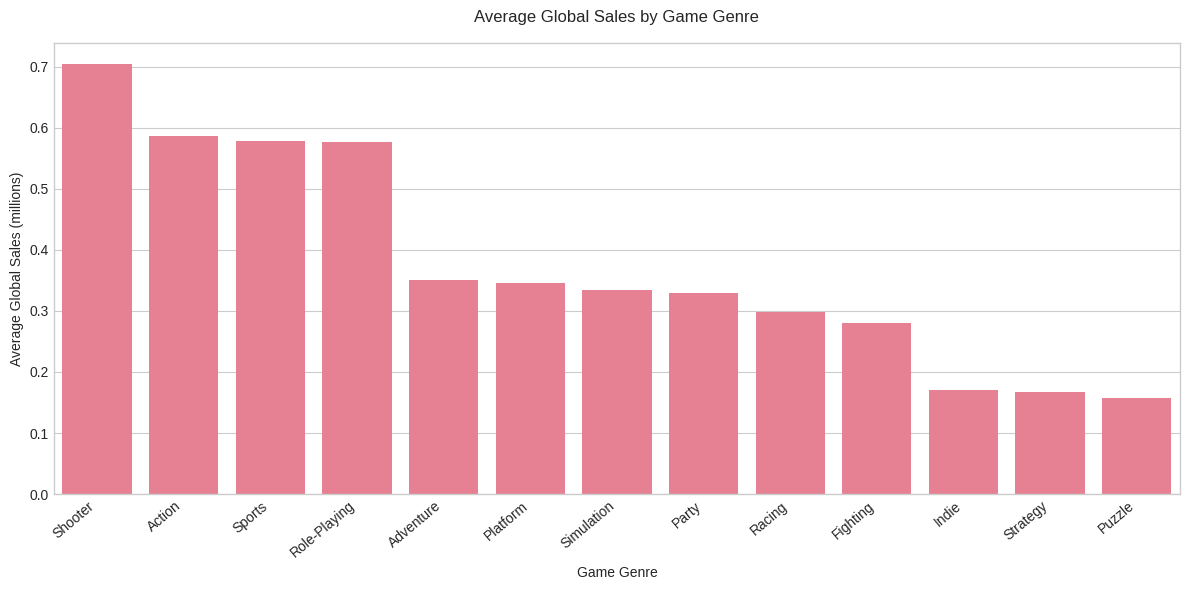

In [7]:
#vg_sales = pd.read_csv("https://raw.githubusercontent.com/CS133-DataVisualization/term-project-group-13/refs/heads/main/vg_sales_v1.csv")

avg_sales = (
    vg_sales.groupby("Genre", as_index=False)["Global_Sales_M"]
    .mean()
    .sort_values("Global_Sales_M", ascending=False)
)

plt.figure(figsize=(12,6))
sns.barplot(data=avg_sales, x="Genre", y="Global_Sales_M")
plt.title("Average Global Sales by Game Genre", pad=15)
plt.xlabel("Game Genre")
plt.ylabel("Average Global Sales (millions)")
plt.xticks(rotation=40, ha="right")
plt.tight_layout()
plt.show()


This bar chart shows that Shooter, Action, and Sports genres have the highest average global sales, while Puzzle and Strategy genres are the lowest.

### Q3: Come up with a another unique question. This question must use map() or apply()

Classify games into viewer popularity levels (“High”, “Medium”, “Low”) using the Avg_Concurrent_Viewers column

In [15]:

# Your code here . . .
def viewer_popularity(viewers):
    if viewers > 70:
        return "High"
    elif viewers >= 40:
        return "Medium"
    else:
        return "Low"

merged_df['Viewer_Popularity'] = merged_df['Avg_Concurrent_Viewers'].apply(viewer_popularity)
merged_df[['Game', 'Avg_Concurrent_Viewers', 'Viewer_Popularity']].head()

,Game,Avg_Concurrent_Viewers,Viewer_Popularity
0,Bridge Odyssey,342,High
1,Bridge Odyssey,453,High
2,Variety Tales 5,57,Medium
3,Alien Command,143,High
4,Think Tales,2,Low


### Q4: Create an interactive plot
Create an interactive plot using plotly. Your plot can be a previously asked question or a new question, however explain how this interaction strengthen what you want to communicate with your audience.

In [10]:
vg_sales["Global_Sales_USD"] = vg_sales["Global_Sales_M"] * 1_000_000

avg_sales = (
    vg_sales.groupby("Genre", as_index=False)
            .agg(Global_Sales_M=("Global_Sales_M","mean"),
                 Total_Sales_USD=("Global_Sales_USD","sum"))
            .sort_values("Global_Sales_M", ascending=False)
)

fig = px.bar(
    avg_sales,
    x="Genre",
    y="Global_Sales_M",
    color="Global_Sales_M",
    color_continuous_scale="RdPu",
    title="Average Global Sales by Game Genre (Interactive)",
    custom_data=["Total_Sales_USD"]
)

fig.update_traces(
    hovertemplate="<b>%{x}</b><br>Total Sales: %{customdata[0]:$,.0f}<extra></extra>"
)

fig.update_layout(
    xaxis_title="Game Genre",
    yaxis_title="Average Global Sales (millions)",
    template="plotly_white"
)

fig.show()


This interactive bar chart displays the average global sales by video game genre, with hover tooltips showing the total global sales in dollars. The interactivity allows users to explore the data more deeply they can hover to see exact sales values, compare genres precisely, and visually identify which genres generate the most revenue.


## Q5: Additional datasets and data processing
For the questions below you do not need to do the plotting if you have not found another complementary dataset. However, write the psuedocode of how you could go about answering the questions and sketches of what your visualization might be. Answer the following:

What additional datasets would you need to find or create to help strengthen your data?
How would you combine the dataset?
Do you need to reshape your data and how could you go about it?


To strengthen our video game dataset, we would incorporate several complementary data sources:

Market data such as regional GDP, gaming market size, and platform growth rates.

Social media and engagement data (Twitter, Reddit, YouTube) to analyze audience sentiment and online visibility.

Technical and platform data including hardware sales and digital vs. physical sales ratios.

Demographic and psychographic data showing player profiles, preferences, and cultural influences.

Financial and business data like publisher revenue, marketing budgets, and development timelines.

We would combine these datasets by aligning on release year, platform, and region. Temporal and geographic alignment would enable trend analysis, while mapping genres and platforms to demographic or social data could reveal audience patterns.

Reshaping steps would include aggregating by region and year, normalizing metrics, and creating new derived features such as market share per genre or sales per marketing dollar.

In [11]:
# Your code here . . .
print("=== ADDITIONAL DATASETS NEEDED ===")
print("\n1. MARKET DATA:")
print("   • Economic indicators (GDP, inflation) by region and year")
print("   • Gaming market size and growth rates by platform")
print("   • Competitor analysis and market share data")
print("   • Source: Industry reports, economic databases")

print("\n2. SOCIAL MEDIA & ENGAGEMENT:")
print("   • Twitter mentions and sentiment analysis")
print("   • Reddit discussion volume and sentiment")
print("   • YouTube gaming channel coverage")
print("   • Source: Social media APIs, web scraping")

print("\n3. TECHNICAL & PLATFORM DATA:")
print("   • Platform-specific technical capabilities")
print("   • Hardware sales data (consoles, PCs)")
print("   • Digital vs physical sales ratios")
print("   • Source: Platform manufacturers, industry reports")

print("\n4. DEMOGRAPHIC & PSYCHOGRAPHIC DATA:")
print("   • Player demographics by genre/platform")
print("   • Gaming behavior patterns")
print("   • Cultural preferences by region")
print("   • Source: Surveys, market research firms")

print("\n5. FINANCIAL & BUSINESS DATA:")
print("   • Publisher financial performance")
print("   • Marketing spend data")
print("   • Development timeline and delays")
print("   • Source: Financial reports, industry databases")


=== ADDITIONAL DATASETS NEEDED ===

1. MARKET DATA:
   • Economic indicators (GDP, inflation) by region and year
   • Gaming market size and growth rates by platform
   • Competitor analysis and market share data
   • Source: Industry reports, economic databases

2. SOCIAL MEDIA & ENGAGEMENT:
   • Twitter mentions and sentiment analysis
   • Reddit discussion volume and sentiment
   • YouTube gaming channel coverage
   • Source: Social media APIs, web scraping

3. TECHNICAL & PLATFORM DATA:
   • Platform-specific technical capabilities
   • Hardware sales data (consoles, PCs)
   • Digital vs physical sales ratios
   • Source: Platform manufacturers, industry reports

4. DEMOGRAPHIC & PSYCHOGRAPHIC DATA:
   • Player demographics by genre/platform
   • Gaming behavior patterns
   • Cultural preferences by region
   • Source: Surveys, market research firms

5. FINANCIAL & BUSINESS DATA:
   • Publisher financial performance
   • Marketing spend data
   • Development timeline and delays
   

In [ ]:
print("\n=== DATA COMBINATION STRATEGY ===")
print("\n1. TEMPORAL ALIGNMENT:")
print("   • Align all datasets by release year and month")
print("   • Create time-series features (seasonality, trends)")
print("   • Handle different data frequencies (daily, monthly, yearly)")

print("\n2. GEOGRAPHIC MAPPING:")
print("   • Map regions to economic indicators")
print("   • Align cultural preferences with game genres")
print("   • Create region-specific performance metrics")

print("\n3. PLATFORM INTEGRATION:")
print("   • Link platform capabilities to game performance")
print("   • Map hardware sales to game sales")
print("   • Create platform-specific market share metrics")

print("\n4. GENRE & AUDIENCE MAPPING:")
print("   • Link genres to demographic preferences")
print("   • Map social media engagement to game types")
print("   • Create audience overlap matrices")



=== DATA COMBINATION STRATEGY ===

1. TEMPORAL ALIGNMENT:
   • Align all datasets by release year and month
   • Create time-series features (seasonality, trends)
   • Handle different data frequencies (daily, monthly, yearly)

2. GEOGRAPHIC MAPPING:
   • Map regions to economic indicators
   • Align cultural preferences with game genres
   • Create region-specific performance metrics

3. PLATFORM INTEGRATION:
   • Link platform capabilities to game performance
   • Map hardware sales to game sales
   • Create platform-specific market share metrics

4. GENRE & AUDIENCE MAPPING:
   • Link genres to demographic preferences
   • Map social media engagement to game types
   • Create audience overlap matrices
